# # ☛ Problem Statement :
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

# ≣ Variables in the Dataset :
Features: 
    age :(numeric)
    job : type of job
    marital : marital status
    educational_qual : education status
    call_type : contact communication type
    day: last contact day of the month (numeric)
    mon: last contact month of year
    dur: last contact duration, in seconds (numeric)
    num_calls: number of contacts performed during this campaign and for this client 
    prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
    y - has the client subscribed to the insurance?


In [2]:
## Importing necessary dependencies


In [3]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
!pip install seaborn

# # 1. Display top 5 rows of the dataset

In [5]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# 2. Find shape of our dataset

In [6]:
df.shape

(45211, 11)

# 3. Get information about our dataset like i)Total number of rows ii) Total number of columns iii)Datatype of each column iv)Memory requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


# 4.Check Null Values in the dataset

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# 5.Get overall Statistics about the dataset

In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# Data cleaning

In [10]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


# Numerical column

In [11]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [12]:
%matplotlib inline


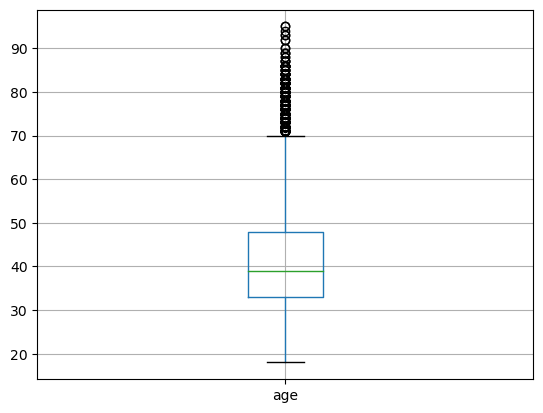

In [13]:
ax=df.boxplot(column="age")

# outlier correction using IQR method

In [14]:
q3=df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr2=q3-q1
print(iqr2)

15.0


In [15]:
q3+(1.5*iqr2)

70.5

In [16]:
q1-(1.5*iqr2)

10.5

In [17]:
df.age=df.age.clip(10.5,70.5)

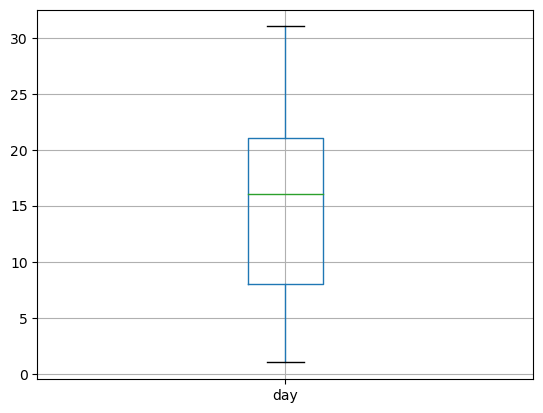

In [18]:
ax1=df.boxplot(column="day")

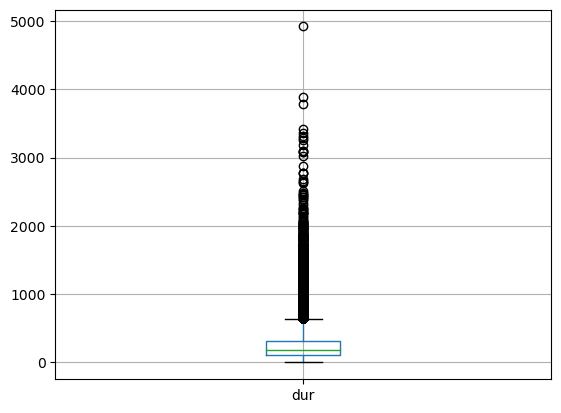

In [19]:
ax2=df.boxplot(column="dur")

In [20]:
q3=df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr=q3-q1
print(iqr)

216.0


In [21]:
q3+(1.5*iqr)

643.0

In [22]:
q1-(1.5*iqr)

-221.0

In [23]:
df.dur=df.dur.clip(2,643.0)

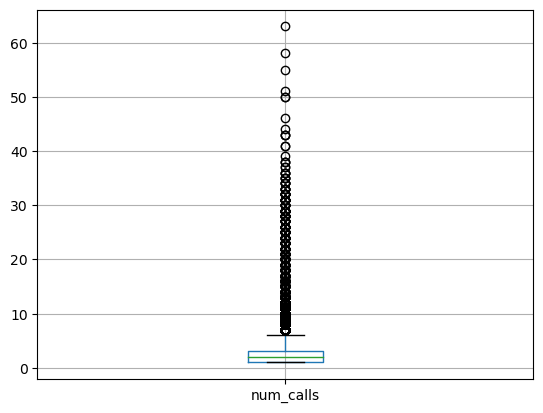

In [24]:
ax2=df.boxplot(column="num_calls")

In [25]:
q3=df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr1=q3-q1
print(iqr1)

2.0


In [26]:
q3+(3.5*iqr1)

10.0

In [27]:
q1-(1.5*iqr1)

-2.0

In [28]:
df.num_calls=df.num_calls.clip(1,6.0)

# categorical column

In [29]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [30]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


In [31]:
# for column "job"
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [32]:
# for column "marital"
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [33]:
# for column "call_type"
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [34]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [35]:
# for column "mon"
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [36]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [37]:
# for column "y"
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Removing duplicate values

In [38]:
df = df.drop_duplicates()

In [39]:
df.shape

(45195, 11)

# EDA

# 1.Distribution Of Feature

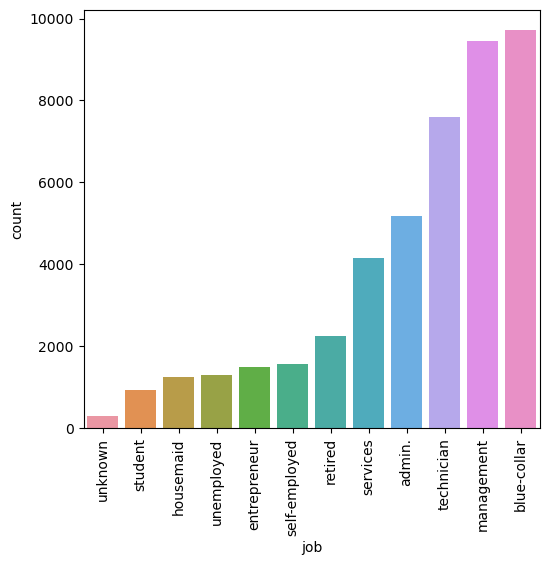

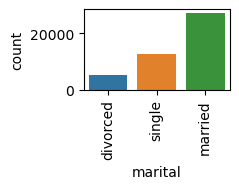

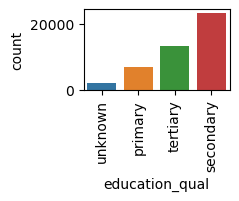

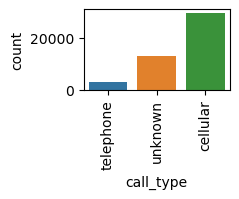

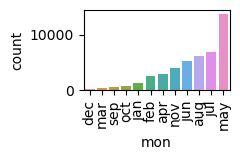

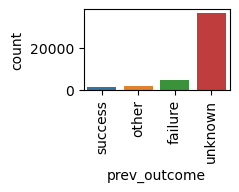

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
#plotting count plots for all the categorical columns
#sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))
plt.subplot(431)
# Assuming 'df' is your DataFrame
job_counts = df['job'].value_counts()
order = job_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='job', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


plt.subplot(432)
marital_counts = df['marital'].value_counts()
order = marital_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='marital', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

plt.subplot(433)
education_qual_counts = df['education_qual'].value_counts()
order = education_qual_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='education_qual', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

plt.subplot(434)
call_type_counts = df['call_type'].value_counts()
order = call_type_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='call_type', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

plt.subplot(435)
mon_counts = df['mon'].value_counts()
order = mon_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='mon', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


plt.subplot(436)
prev_outcome_counts = df['prev_outcome'].value_counts()
order = prev_outcome_counts.index[::-1]  # Reverse the order based on counts

# Create the countplot
sns.countplot(data=df, x='prev_outcome', order=order)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

# 2. Feature VS Target

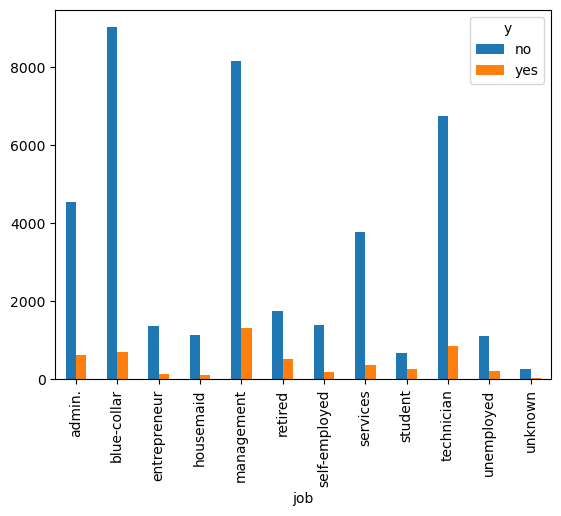

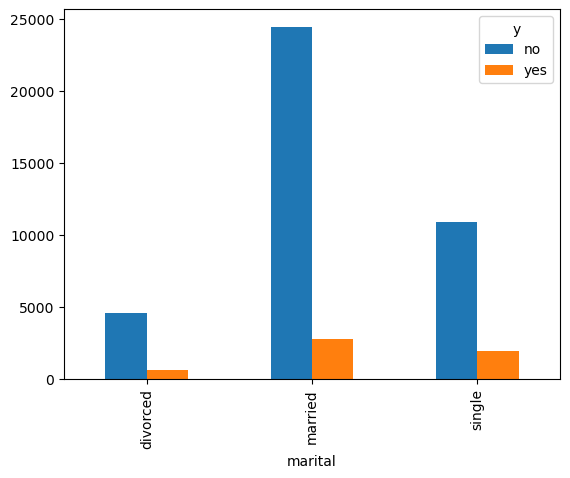

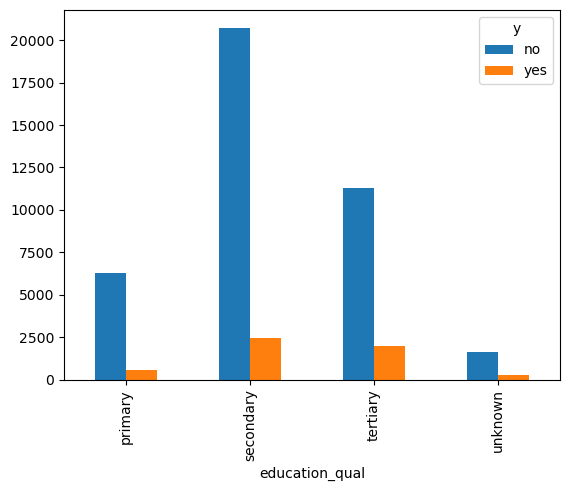

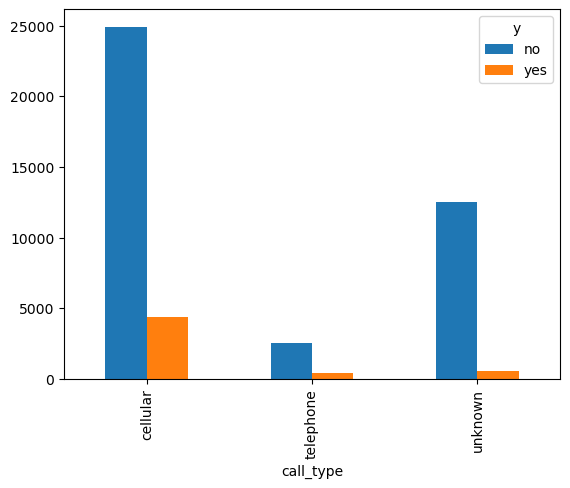

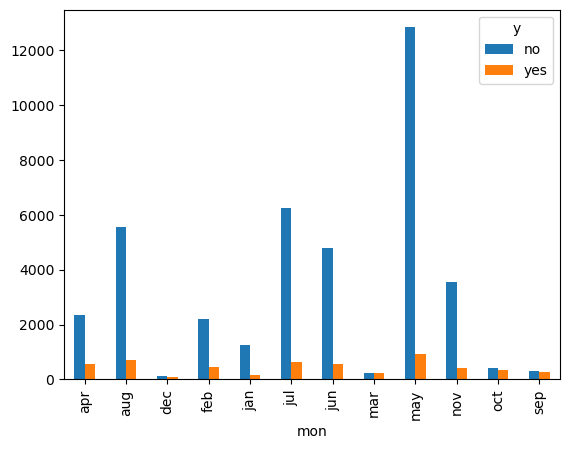

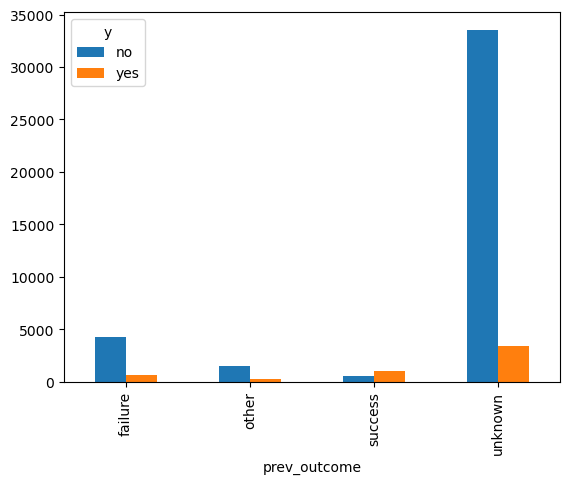

In [41]:
crosstb = pd.crosstab(df.job, df.y)
barplot = crosstb.plot.bar(rot=90)

crosstb = pd.crosstab(df.marital, df.y)
barplot = crosstb.plot.bar(rot=90)

crosstb = pd.crosstab(df.education_qual, df.y)
barplot = crosstb.plot.bar(rot=90)

crosstb = pd.crosstab(df.call_type, df.y)
barplot = crosstb.plot.bar(rot=90)

crosstb = pd.crosstab(df.mon, df.y)
barplot = crosstb.plot.bar(rot=90)

crosstb = pd.crosstab(df.prev_outcome, df.y)
barplot = crosstb.plot.bar(rot=90)

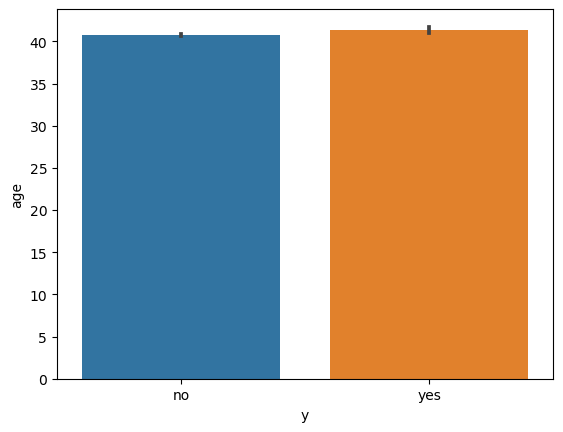

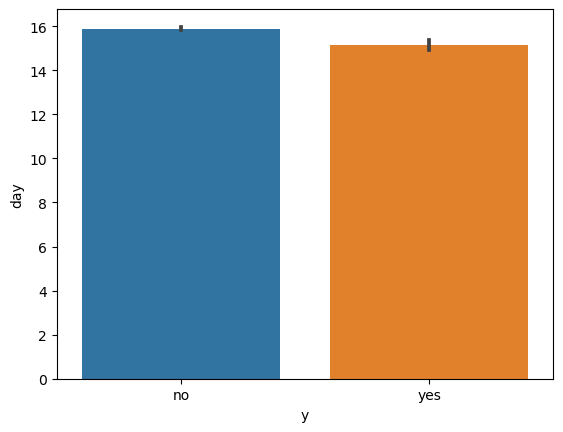

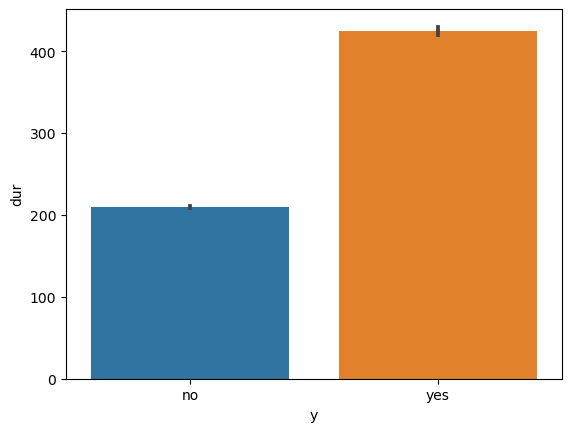

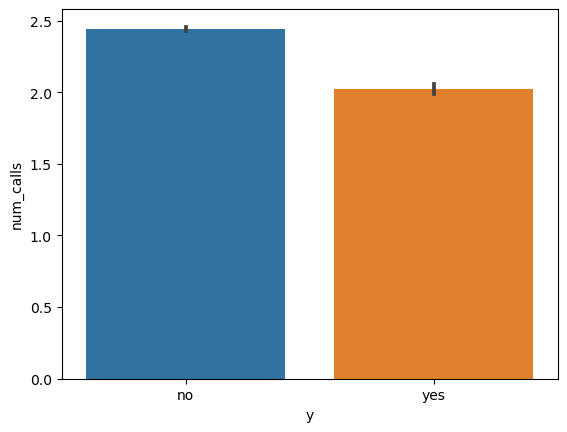

In [42]:
sns.barplot(data=df, x='y',y='age' )
plt.show()

sns.barplot(data=df, x='y',y='day' )
plt.show()

sns.barplot(data=df, x='y',y='dur' )
plt.show()

sns.barplot(data=df, x='y',y='num_calls' )
plt.show()

Interpretations :

1.) "Based on the 'job' column, it appears that clients with the 'management' designation have a higher subscription rate for insurance."

2.)"According to the 'marital' column, married clients have subscribed to the insurance."

3.) "According to the 'education_qual' column, clients in the 'secondary education' category have subscribed to the insurance."

4.)"According to the 'call_type' column, clients who connect through the 'cellular' category have subscribed to the insurance."

5.) "According to the 'mon' column, clients who connect in the month of May have a higher subscription rate for insurance."

6.)"According to the 'num_calls' who connect less than two calls have a higher subscription rate for insurance."

7.)According to the 'dur' who connect more than 400 seconds have a higher subscription rate for insurance."

8.)According to the 'day' who connect with in 1 to 15 day have a higher subscription rate for insurance."

# Data preprocessing

In [43]:
df['job'] = df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10,'unknown':11})
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})
df['education_qual'] = df['education_qual'].map({'primary':0,'secondary':1,'tertiary':2,'unknown':3})
df['call_type'] = df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})
df['mon'] = df['mon'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})
df['y'] = df['y'].map({'no':0,'yes':1})

In [44]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,1,0,2,1,5,4,261,1,0,0
1,44.0,2,1,1,1,5,4,151,1,0,0
2,33.0,7,0,1,1,5,4,76,1,0,0
3,47.0,0,0,3,1,5,4,92,1,0,0
4,33.0,11,1,3,1,5,4,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,2,0,2,0,17,10,643,3,0,1
45207,70.5,5,2,0,0,17,10,456,2,0,1
45208,70.5,5,0,1,0,17,10,643,5,3,1
45209,57.0,0,0,1,2,17,10,508,4,0,0


# Splitting the data into input data and output data

In [45]:
X = df.drop('y',axis=1)
y = df['y']

In [46]:
X

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,1,0,2,1,5,4,261,1,0
1,44.0,2,1,1,1,5,4,151,1,0
2,33.0,7,0,1,1,5,4,76,1,0
3,47.0,0,0,3,1,5,4,92,1,0
4,33.0,11,1,3,1,5,4,198,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,2,0,2,0,17,10,643,3,0
45207,70.5,5,2,0,0,17,10,456,2,0
45208,70.5,5,0,1,0,17,10,643,5,3
45209,57.0,0,0,1,2,17,10,508,4,0


In [47]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45195, dtype: int64

# Handling imbalance data

<Axes: xlabel='y', ylabel='count'>

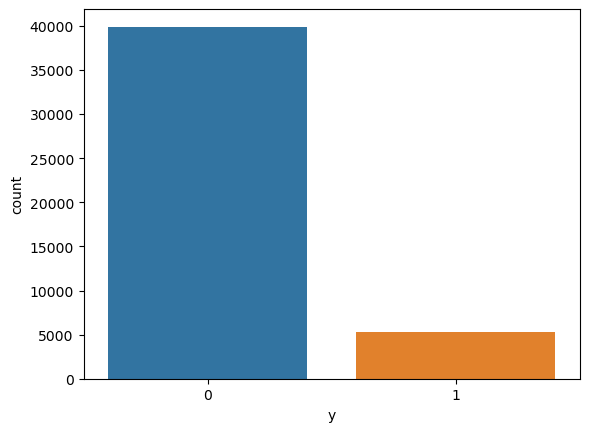

In [48]:
sns.countplot(data=df, x='y')


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
X1,y1 = SMOTE().fit_resample(X,y)

In [51]:
y1.value_counts()

0    39908
1    39908
Name: y, dtype: int64

# Splitting the dataset into the training set and test set

In [52]:
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

# Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train

array([[-0.96389154, -1.02672071,  0.86566463, ...,  1.57084378,
         0.63145676, -0.49130877],
       [-0.74159887, -0.64478247, -0.71663342, ..., -1.00392756,
        -0.75445978, -0.49130877],
       [-0.29046025, -0.26284424, -0.71663342, ...,  1.10226438,
        -0.75445978, -0.49130877],
       ...,
       [-0.91359852, -0.64478247, -0.71663342, ...,  1.08294152,
        -0.06150151, -0.49130877],
       [-0.70966453,  0.88297048, -0.71663342, ..., -0.99909685,
        -0.75445978, -0.49130877],
       [ 0.25371596,  2.41072344, -0.71663342, ...,  0.00569197,
        -0.75445978, -0.49130877]])

# Linear regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log = LogisticRegression()

In [58]:
log.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred1 = log.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,y_pred1)

0.7882109746930593

In [62]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [63]:
precision_score(y_test,y_pred1)

0.789247311827957

In [64]:
recall_score(y_test,y_pred1)

0.7843852149861705

In [65]:
f1_score(y_test,y_pred1)

0.7868087521281292

# SVC

In [66]:
from sklearn import svm

In [67]:
svm = svm.SVC()

In [68]:
svm.fit(X_train , y_train)

SVC()

In [69]:
y_pred2 = svm.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred2)

0.8540466048609371

In [71]:
precision_score(y_test,y_pred2)

0.8202733485193622

In [72]:
recall_score(y_test,y_pred2)


0.9054563741513704

In [73]:
f1_score(y_test,y_pred1)

0.7868087521281292

# KNeighbors Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred3 = knn.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred3)

0.878789776998246

In [79]:
precision_score(y_test,y_pred3)

0.8518648427452356

In [80]:
recall_score(y_test,y_pred3)

0.9160170983153131

In [81]:
f1_score(y_test,y_pred3)

0.8827770036954019

# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier()

In [84]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred4 = dt.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred4)

0.8946379353545477

In [87]:
precision_score(y_test,y_pred4)

0.8798449612403101

In [88]:
recall_score(y_test,y_pred4)

0.9132511943676138

In [89]:
f1_score(y_test,y_pred4)

0.8962368908081432

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred5 = rf.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred5)

0.9284014031571035

In [95]:
precision_score(y_test,y_pred5)

0.9037344398340249

In [96]:
recall_score(y_test,y_pred5)

0.9583857178777974

In [97]:
f1_score(y_test,y_pred5)

0.9302580999450851

In [ ]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20,22,24,26,30])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestClassifier(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.7821993356953577
Depth :  4 cross_val_score :  0.8085883092156043
Depth :  8 cross_val_score :  0.8545072600458159
Depth :  10 cross_val_score :  0.8723297334833442
Depth :  11 cross_val_score :  0.8795965939631791
Depth :  12 cross_val_score :  0.886659809318928
Depth :  13 cross_val_score :  0.8930652476858107
Depth :  15 cross_val_score :  0.9050774362203371
Depth :  18 cross_val_score :  0.9183268505713424
Depth :  20 cross_val_score :  0.9222421768244903
Depth :  22 cross_val_score :  0.9248418828666687
Depth :  24 cross_val_score :  0.9265801741551435


# Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gbc = GradientBoostingClassifier()

In [100]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [101]:
y_pred6 = gbc.predict(X_test)

In [128]:
accuracy_score(y_test,y_pred6)

0.8686419443748434

In [129]:
precision_score(y_test,y_pred6)

0.846609066161676

In [130]:
recall_score(y_test,y_pred6)

0.8992959517224038

In [131]:
f1_score(y_test,y_pred6)

0.8721575321587515

In [107]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC' : [accuracy_score(y_test,y_pred1),
                                    accuracy_score(y_test,y_pred2),
                                    accuracy_score(y_test,y_pred3),
                                    accuracy_score(y_test,y_pred4),
                                    accuracy_score(y_test,y_pred5),
                                    accuracy_score(y_test,y_pred6),
                                   ]})

In [108]:
final_data

,Models,ACC
0,LR,0.788211
1,SVC,0.854047
2,KNN,0.878790
3,DT,0.894638
4,RF,0.928401
5,GBC,0.868642


In [109]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'f1s' : [f1_score(y_test,y_pred1),
                                    f1_score(y_test,y_pred2),
                                    f1_score(y_test,y_pred3),
                                    f1_score(y_test,y_pred4),
                                    f1_score(y_test,y_pred5),
                                    f1_score(y_test,y_pred6),
                                    ]})

In [110]:
final_data

,Models,f1s
0,LR,0.786809
1,SVC,0.860763
2,KNN,0.882777
3,DT,0.896237
4,RF,0.930258
5,GBC,0.872158


# Save the model

In [111]:
X1 = sc.fit_transform(X1)

In [112]:
rf.fit(X1,y1)

RandomForestClassifier()

In [113]:
import joblib

In [114]:
joblib.dump(rf,'loan')

['loan']

In [115]:
model = joblib.load('loan')

In [116]:
model.predict([[26,1,0,2,0,5,92,1,4,0]])

array([0], dtype=int64)

In [118]:
model.predict([[59,3,0,1,1,5,4,1042,1,0]])

array([1], dtype=int64)